In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [93]:
moons = make_moons(n_samples=200, noise=0.2, random_state=0)
X = moons[0]
y = moons[1]

In [94]:
from matplotlib.colors import ListedColormap

In [95]:
def plot_decison_boundary(model, X, y, margin=0.3):
    _x1 = np.linspace(X[:, 0].min()-margin, X[:, 0].max()+margin, 100)
    _x2 = np.linspace(X[:, 1].min()-margin, X[:, 1].max()+margin, 100)
    x1, x2 = np.meshgrid(_x1, _x2)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape((x1.shape))
    custom_map = ListedColormap(['mediumblue', 'orangered'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_map)

In [96]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bo', ms=15)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r^', ms=15)
    plt.xlabel('$x_0$', fontsize=30)
    plt.ylabel('$x_1$', fontsize=30, rotation=0)

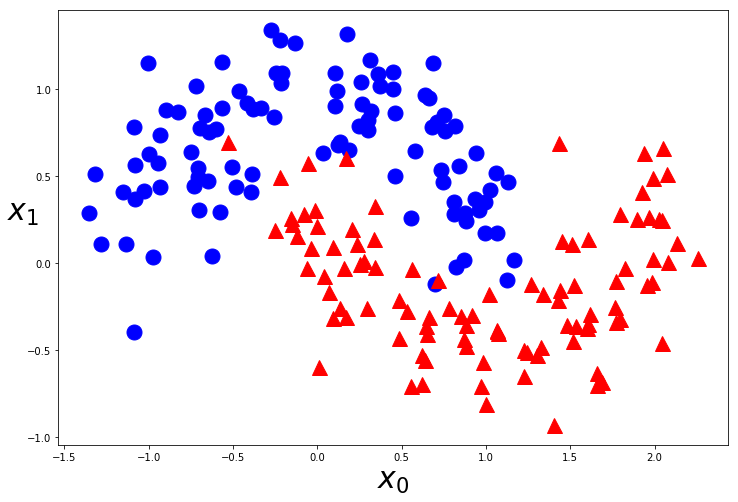

In [97]:
plt.figure(figsize=(12, 8))
plot_dataset(X, y)
plt.show()

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [100]:
log_reg = LogisticRegression().fit(X_train, y_train)
tree_clf = DecisionTreeClassifier().fit(X_train, y_train)

/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [101]:
print(log_reg.score(X_test, y_test))
print(tree_clf.score(X_test, y_test))

0.84
0.98


In [102]:
from sklearn.model_selection import KFold, cross_val_score

In [103]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [104]:
log_reg_score = cross_val_score(log_reg, X, y, cv=kfold)
tree_clf_score = cross_val_score(tree_clf, X, y, cv=kfold)

print(log_reg_score)
print(tree_clf_score)

[0.85  0.875 0.875 0.825 0.775]
[0.975 0.95  0.95  0.95  0.9  ]


/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/linear_model/lo

In [105]:
print(log_reg_score.mean())
print(tree_clf_score.mean())

0.8400000000000001
0.9450000000000001


In [106]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [107]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [108]:
log_reg_score2 = cross_validate(log_reg, X, y, cv=skf)
tree_clf_score2 = cross_validate(tree_clf, X, y, cv=skf)

print(log_reg_score2)
print(tree_clf_score2)

{'fit_time': array([0.00107789, 0.0005939 , 0.00068402, 0.00074601, 0.0009861 ]), 'score_time': array([0.00022125, 0.0001893 , 0.00021696, 0.00038791, 0.001055  ]), 'test_score': array([0.825, 0.85 , 0.875, 0.925, 0.725]), 'train_score': array([0.84375, 0.85625, 0.83125, 0.8375 , 0.85625])}
{'fit_time': array([0.00095987, 0.00034809, 0.00041008, 0.00029588, 0.00028205]), 'score_time': array([0.00026917, 0.00018287, 0.000247  , 0.00017691, 0.00017309]), 'test_score': array([0.975, 0.975, 0.9  , 0.95 , 0.9  ]), 'train_score': array([1., 1., 1., 1., 1.])}


/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/linear_model/lo

In [109]:
from sklearn.metrics import confusion_matrix

In [110]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_tree_clf = tree_clf.predict(X_test)

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_tree_clf = confusion_matrix(y_test, y_pred_tree_clf)

In [112]:
print(cm_log_reg)
print('\n')
print(cm_tree_clf)

[[23  5]
 [ 3 19]]


[[28  0]
 [ 1 21]]


In [113]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [115]:
print('precision log_reg:\n', precision_score(y_test, y_pred_log_reg))
print('\n')
print('precision tree_clf:\n', precision_score(y_test, y_pred_tree_clf))

precision log_reg:
 0.7916666666666666


precision tree_clf:
 1.0


In [116]:
print('recall log_reg:\n', recall_score(y_test, y_pred_log_reg))
print('\n')
print('recall tree_clf:\n', recall_score(y_test, y_pred_tree_clf))

recall log_reg:
 0.8636363636363636


recall tree_clf:
 0.9545454545454546


In [117]:
print('f1_score log_reg:\n', f1_score(y_test, y_pred_log_reg))
print('\n')
print('f1_score tree_clf:\n', f1_score(y_test, y_pred_tree_clf))

f1_score log_reg:
 0.8260869565217391


f1_score tree_clf:
 0.9767441860465117


In [118]:
from sklearn.metrics import precision_recall_curve

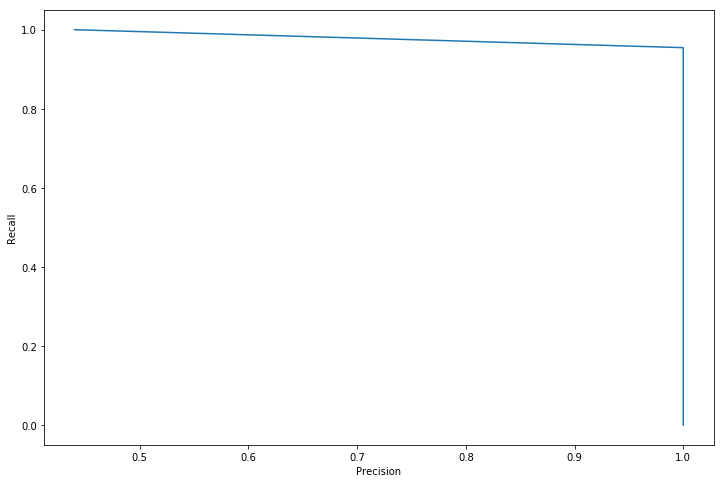

In [120]:
precision, recall, curve = precision_recall_curve(y_test, y_pred_tree_clf)

plt.figure(figsize=(12, 8))
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [121]:
from mglearn.datasets import make_wave

In [122]:
X, y = make_wave(n_samples=100)

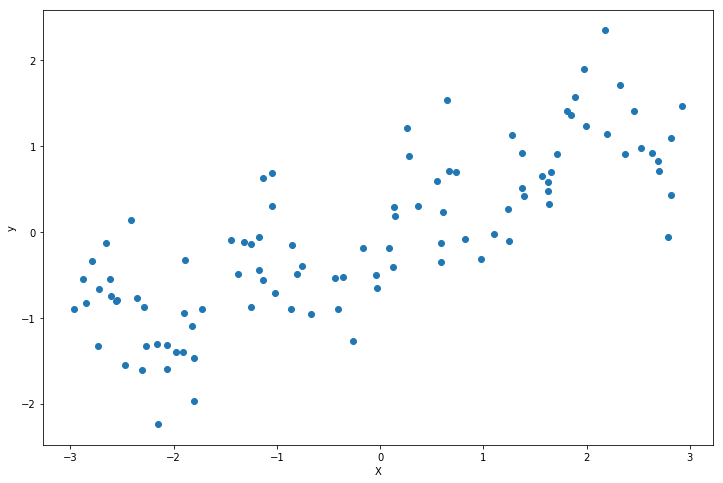

In [124]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [127]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [128]:
print(lin_reg.score(X_test, y_test))

0.621210114749764


In [129]:
from sklearn.metrics import mean_squared_error

In [130]:
y_pred = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse

0.3621150673476498

In [131]:
rmse = np.sqrt(mse)
rmse

0.6017599748634416